<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Bank_Customer_Churn_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Model: Bank Customer Churn Prediction


##Problem Definition:
In today’s highly competitive banking industry, retaining existing customers is crucial for sustained profitability and growth. One of the major challenges banks face is customer churn — when existing customers stop using the bank’s services.

## Problem Statement
 In the competitive banking sector, customer retention is critical for maintaining stable revenue and reducing acquisition costs. However, the bank faces a challenge: a significant percentage of its customers choose to leave the bank churn each year.

 ## End User Objective
 The end user objective of this project is to provide the bank’s customer relationship management (CRM) and marketing teams with an easy-to-use, data-driven tool that:
 1.  Accurately predicts which existing customers are likely to leave the bank (churn)
 2.  Helps prioritize customer retention efforts by highlighting high-risk customers
 3. Supports decision-making for designing personalized offers, loyalty programs, or targeted interventions to improve customer satisfaction and reduce churn rates

## Outcome:
By the end of this project, we successfully developed and evaluated several machine learning models to predict customer churn for a bank.

A predictive model like Random Forest, XGBoost that can classify whether a customer is likely to exit churn or stay, with reasonable accuracy and balanced performance across classes.

Identification of key factors influencing churn, such as credit score, age, balance, tenure, and geography.

A pipeline that combines data preprocessing, handling class imbalance using SMOTE, scaling, and classification, ready to be deployed or integrated into the bank’s CRM system.

## Import Neccessory Library

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode= 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
# Import scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Import Dataset using Pandas Function

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

# It will print Shuffle 100% Dataset
df.sample(frac = 1)
df.head()
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking Information about Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Checking Null Values Information

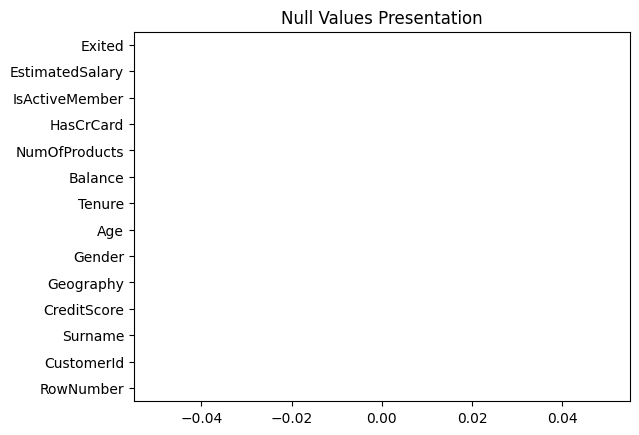

In [4]:
# Step 04: Checking Null Values present in dataset
df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values Presentation')
plt.show()

In [5]:
print(df.describe())
df.head()

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Segregate Numerical columns and Categorical columns

In [6]:
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

## EDA : Checking Univariate Analysis

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Mean':df[i].mean(),
      'Median':df[i].median(),
      'Maximum':df[i].max(),
      'Minimum':df[i].min(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
      'Standard Deviation': df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurtosis()

  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Count,Mean,Median,Maximum,Minimum,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,RowNumber,10000,5.000500e+03,5.000500e+03,10000.00,1.00,2500.75,7.500250e+03,4999.5000,2886.895680,0.000000,-1.200000
1,CustomerId,10000,1.569094e+07,1.569074e+07,15815690.00,15565701.00,15628528.25,1.575323e+07,124705.5000,71936.186123,0.001149,-1.196113
2,CreditScore,10000,6.505288e+02,6.520000e+02,850.00,350.00,584.00,7.180000e+02,134.0000,96.653299,-0.071607,-0.425726
3,Age,10000,3.892180e+01,3.700000e+01,92.00,18.00,32.00,4.400000e+01,12.0000,10.487806,1.011320,1.395347
4,Tenure,10000,5.012800e+00,5.000000e+00,10.00,0.00,3.00,7.000000e+00,4.0000,2.892174,0.010991,-1.165225
5,Balance,10000,7.648589e+04,9.719854e+04,250898.09,0.00,0.00,1.276442e+05,127644.2400,62397.405202,-0.141109,-1.489412
6,NumOfProducts,10000,1.530200e+00,1.000000e+00,4.00,1.00,1.00,2.000000e+00,1.0000,0.581654,0.745568,0.582981
7,HasCrCard,10000,7.055000e-01,1.000000e+00,1.00,0.00,0.00,1.000000e+00,1.0000,0.455840,-0.901812,-1.186973
8,IsActiveMember,10000,5.151000e-01,1.000000e+00,1.00,0.00,0.00,1.000000e+00,1.0000,0.499797,-0.060437,-1.996747
9,EstimatedSalary,10000,1.000902e+05,1.001939e+05,199992.48,11.58,51002.11,1.493882e+05,98386.1375,57510.492818,0.002085,-1.181518


## Dropping irrelevant columns

In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [9]:
categorical_col.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

## Data Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encoding all Categorical columns using Label Encoder: Indepedent columns
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


##  Correlation Heatmap Visualization

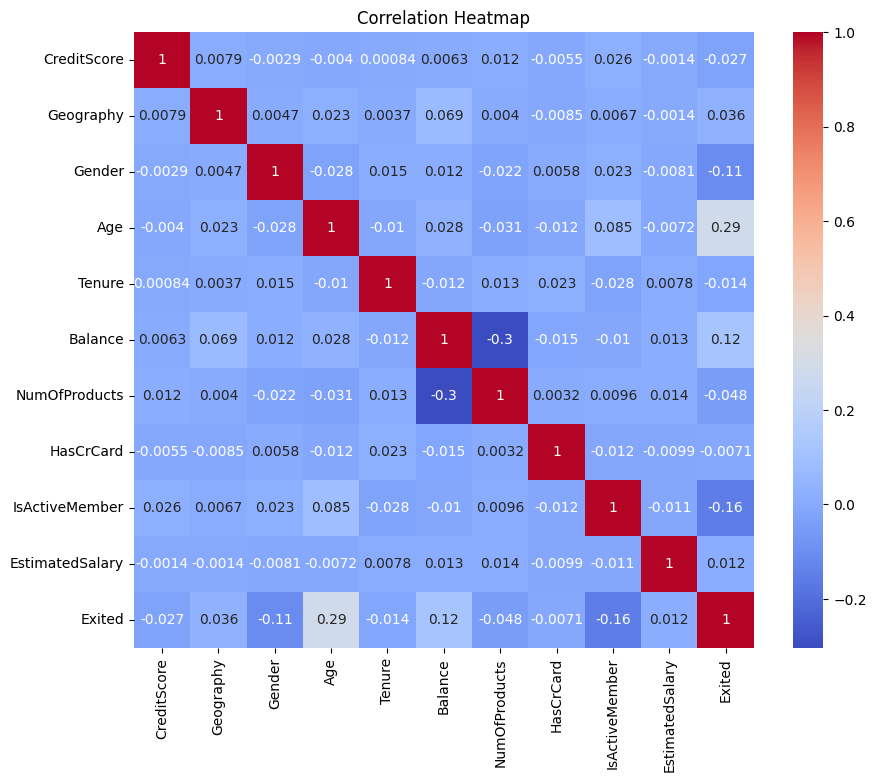

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns
print(num_cols)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


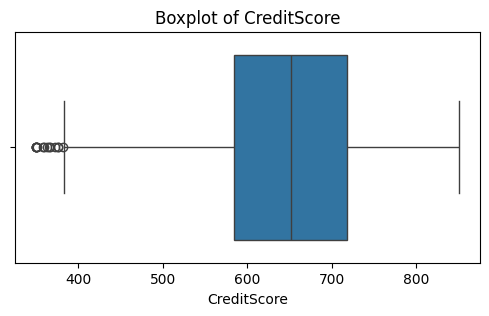

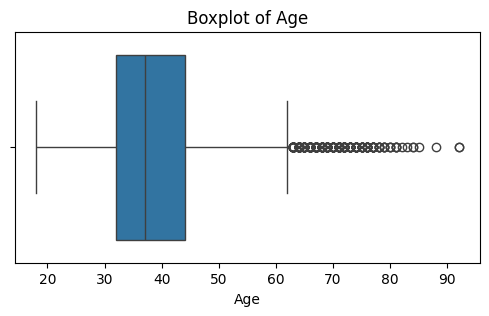

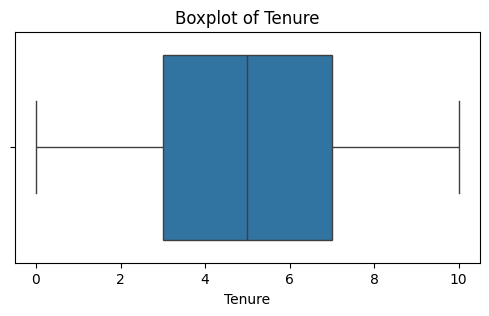

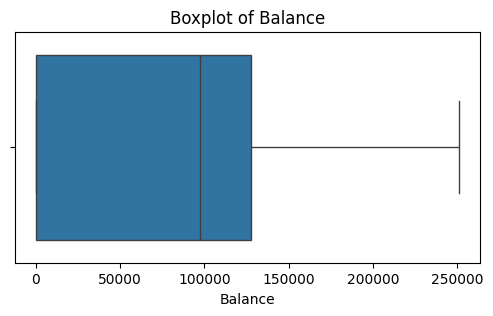

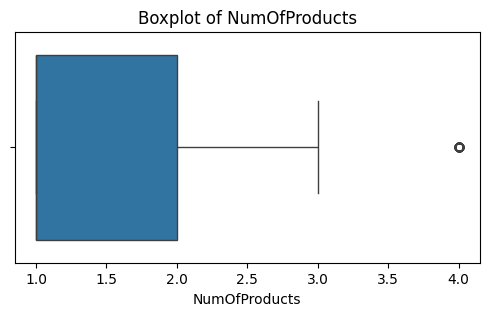

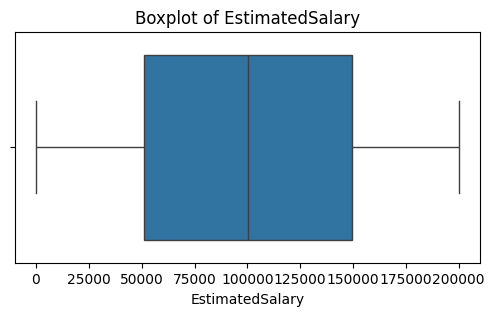

In [14]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Balance'] < (Q1 - 1.5 * IQR)) | (df['Balance'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in Balance: {len(outliers)}")

Number of outliers in Balance: 0


## Checking target variable distribution

In [16]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


## Split the Dataset into X and y

In [17]:
X = df.drop(columns=['Exited'],axis = 1)
y = df['Exited']

## Use train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

 ## Balancing the dataset using SMOTE

In [19]:
sampling = SMOTE()
X_train, y_train = sampling.fit_resample(X_train, y_train)

## Visualizing the target class distribution after balancing

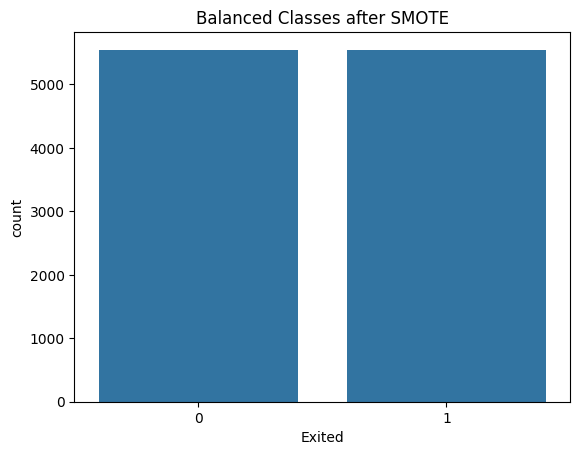

In [20]:
sns.countplot(x=y_train)
plt.title('Balanced Classes after SMOTE')
plt.show()

 ## Feature scaling

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model training step

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict & evaluate

In [23]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8186666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2416
           1       0.53      0.61      0.57       584

    accuracy                           0.82      3000
   macro avg       0.72      0.74      0.73      3000
weighted avg       0.83      0.82      0.82      3000

Confusion Matrix:
 [[2097  319]
 [ 225  359]]


 ## Training and evaluating a Logistic Regression model

In [24]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7256666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      2416
           1       0.37      0.57      0.45       584

    accuracy                           0.73      3000
   macro avg       0.62      0.67      0.63      3000
weighted avg       0.78      0.73      0.75      3000



##  Training and evaluating a Decision Tree model

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.748
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      2416
           1       0.40      0.60      0.48       584

    accuracy                           0.75      3000
   macro avg       0.65      0.69      0.66      3000
weighted avg       0.79      0.75      0.76      3000



## Installing the XGBoost library

In [26]:
pip install xgboost

## Training and evaluating an XGBoost model

In [27]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8183333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      2416
           1       0.53      0.60      0.56       584

    accuracy                           0.82      3000
   macro avg       0.71      0.73      0.72      3000
weighted avg       0.83      0.82      0.82      3000



## # Using Randomized Search cross-validation

In [28]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300,500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [29]:
rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rscv.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         500]},
                   random_state=42, verbose=2)

In [30]:
# Best model
best_model = rscv.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
print("Best Parameters:", rscv.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Test Accuracy: 0.8123333333333334


 ## Manual k-fold cross-validation

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

scores = []

for train_idx, val_idx in kf.split(X_train):   # if X_train is a NumPy array
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

print("Accuracy scores from each fold:", scores)
print("Average accuracy:", np.mean(scores))

Accuracy scores from each fold: [0.8540540540540541, 0.8576576576576577, 0.8585585585585586, 0.8495495495495495, 0.8719567177637512, 0.8602344454463481, 0.8692515779981965, 0.8638412984670875, 0.8494138863841298, 0.8710550045085663]
Average accuracy: 0.86055727503879


## Finding the overall cross-validation accuracy

In [32]:
sum(scores) / len(scores)

0.86055727503879